In [1]:
import glob, os
import numpy as np
import networkx as nx
from networkx.utils import py_random_state
import random
import scipy as sp
from scipy.stats import ranksums, ttest_ind
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from matplotlib import ticker, cm

## regression analysis---social group network

In [14]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
df = pd.read_csv('socialgroup_result.csv') 

### unevenness of speaking turns

In [9]:
#giniA giniB----> acc
y, X = dmatrices('acc1 ~ giniA+giniB', data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                   acc1   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     35.37
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           5.13e-08
Time:                        10:29:30   Log-Likelihood:                -8.7452
No. Observations:                  28   AIC:                             23.49
Df Residuals:                      25   BIC:                             27.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.7291      0.385    191.689      0.0

In [5]:
#giniA giniB----> num of paths
y, X = dmatrices('lognum ~  giniA+giniB', data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                 lognum   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     46.47
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           3.79e-09
Time:                        10:26:33   Log-Likelihood:                -16.599
No. Observations:                  28   AIC:                             39.20
Df Residuals:                      25   BIC:                             43.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8414      0.509     29.148      0.0

In [6]:
#num of paths----> acc
y, X = dmatrices('acc1 ~  lognum', data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                   acc1   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     132.4
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           1.06e-11
Time:                        10:27:02   Log-Likelihood:                -2.2469
No. Observations:                  28   AIC:                             8.494
Df Residuals:                      26   BIC:                             11.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.3024      0.564    114.051      0.0

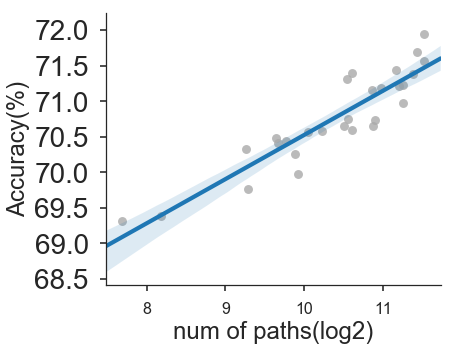

In [7]:
sns.set_context("poster")
sns.set_style("ticks")

current_palette = sns.color_palette('muted',n_colors=5)

point_color = '#a9a9a9'
line_color = current_palette[0]
line_width = 4
point_size = 80

fig = plt.figure(figsize=(6,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.regplot(df['lognum'],df['acc1'],order=1,scatter_kws={'s':point_size, 'color':point_color})
plt.xlabel('num of paths(log2)', fontsize=24)
plt.ylabel('Accuracy(%)', fontsize=24)
plt.yticks(fontsize=28)
plt.show()

### modularity

In [15]:
#modularity----> acc
y, X = dmatrices('acc2 ~ modularity', data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                   acc2   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     10.86
Date:                Tue, 20 Sep 2022   Prob (F-statistic):            0.00402
Time:                        10:31:24   Log-Likelihood:                 3.3212
No. Observations:                  20   AIC:                            -2.642
Df Residuals:                      18   BIC:                           -0.6509
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.4170      0.118    603.557      0.0

In [17]:
#modularity----> num of paths
y, X = dmatrices('lognum_c ~  modularity', data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:               lognum_c   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     57.30
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           5.34e-07
Time:                        10:32:02   Log-Likelihood:                -4.8544
No. Observations:                  20   AIC:                             13.71
Df Residuals:                      18   BIC:                             15.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3519      0.178     58.131      0.0

In [18]:
#num of paths----> acc
y, X = dmatrices('acc2 ~  lognum_c', data=df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                   acc2   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     29.10
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           3.98e-05
Time:                        10:32:19   Log-Likelihood:                 8.2191
No. Observations:                  20   AIC:                            -12.44
Df Residuals:                      18   BIC:                            -10.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.0277      0.695     97.841      0.0

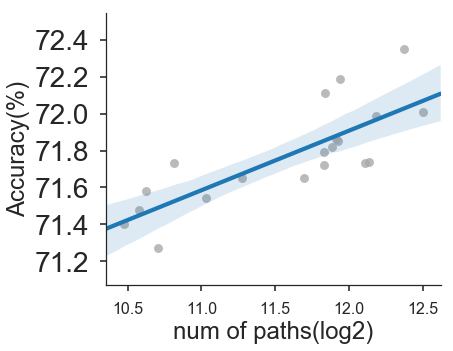

In [19]:
sns.set_context("poster")
sns.set_style("ticks")

current_palette = sns.color_palette('muted',n_colors=5)

point_color = '#a9a9a9'
line_color = current_palette[0]
line_width = 4
point_size = 80

fig = plt.figure(figsize=(6,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.regplot(df['lognum_c'],df['acc2'],order=1,scatter_kws={'s':point_size, 'color':point_color})
plt.xlabel('num of paths(log2)', fontsize=24)
plt.ylabel('Accuracy(%)', fontsize=24)
plt.yticks(fontsize=28)
plt.show()

## regression analysis---WS/ER/BA network

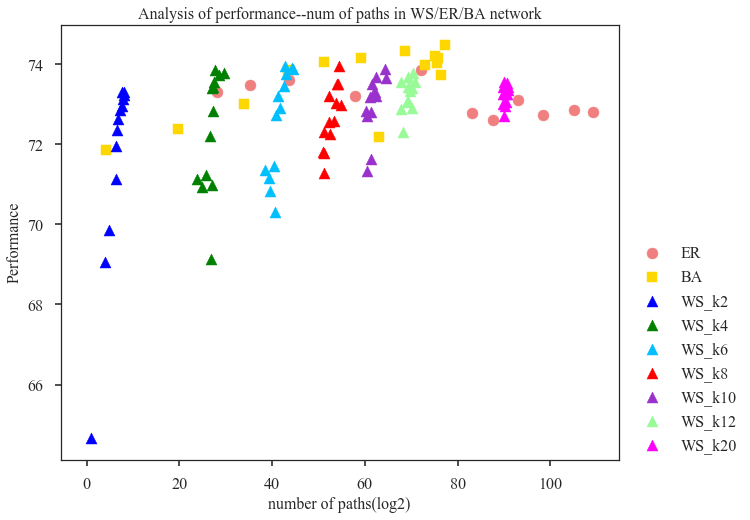

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
fig = plt.figure(figsize=(10,8))
from pylab import mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
font = {'family': 'sans-serif',
            'color': 'k',
            'weight': 'normal',
            'size': 20,}

def scale(edge):
    max_edge = max(edge)
    min_edge = min(edge)
    new_l = []
    for i in edge:
        new_l.append((i-min_edge)/(max_edge-min_edge))
    return new_l
        
er = [2.80E+08,
4.20E+10,
1.30E+13,
2.60E+17,
5.20E+21,
1.10E+25,
2.30E+26,
9.50E+27,
4.20E+29,
4.70E+31,
7.60E+32]
er = [np.log2(t) for t in er]
er_r = [
73.3,
73.47,
73.61,
73.19,
73.85,
72.78,
72.61, 
73.1,
72.72,
72.85,
72.79]

ba = [19,
865576,
1.75E+10,
1.20E+13,
2.50E+15,
6.50E+17,
9.00E+18,
5.00E+20,
1.00E+22,
5.60E+22,
4.20E+22,
9.80E+22,
6.80E+22,
1.80E+23]
ba = [np.log2(t) for t in ba]
ba_r = [71.86,
72.37,
72.99,
73.85,
74.05,
74.14,
72.17,
74.32,
73.98,
74.03,
74.19,
73.72,
74.16,
74.47]

ws6 = [1.70E+12,
6.50E+11,
7.90E+11,
4.10E+11,
1.50E+12,
1.90E+12,
3.40E+12,
2.70E+12,
6.20E+12,
7.30E+12,
9.20E+12,
2.20E+13,
2.40E+13]
ws6 = [np.log2(t) for t in ws6]
ws_6r = [70.3,
71.16,
70.82,
71.36,
71.45,
72.72,
72.9,
73.2,
73.46,
73.96,
73.76,
73.89,
73.88]

ws4 = [1.20E+08,
1.50E+07,
3.20E+07,
5.50E+07,
1.30E+08,
1.10E+08,
1.30E+08,
4.00E+08,
1.70E+08,
1.50E+08,
1.75E+08,
8.00E+08,
2.30E+08]
ws4 = [np.log2(t) for t in ws4]
ws_4r = [69.14,
71.13,
70.93,
71.22,
70.97,
72.2,
73.41,
73.72,
72.82,
73.42,
73.56,
73.78,
73.84]

ws2 = [2.00E+00,
1.60E+01,
2.90E+01,
7.60E+01,
8.50E+01,
9.90E+01,
1.03E+02,
1.56E+02,
1.92E+02,
2.18E+02,
2.10E+02,
2.51E+02,
2.81E+02]
ws2 = [np.log2(t) for t in ws2]
ws_2r = [64.66,
69.06,
69.85,
71.14,
71.96,
72.36,
72.63,
72.86,
72.94,
73.12,
73.29,
73.31,
73.23]


ws8 = [2.60E+15,
2.40E+15,
2.10E+15,
5.60E+15,
2.40E+15,
5.90E+15,
1.20E+16,
5.30E+15,
1.50E+16,
1.70E+16,
3.50E+16,
2.30E+16,
2.00E+16]
ws8 = [np.log2(t) for t in ws8]
ws_8r = [71.27,
71.77,
71.8,
72.55,
72.31,
72.26,
72.57,
73.21,
73.02, 
73.5,
72.98,
73.94,
73.5]

ws10 = [1.60E+18,
2.70E+18,
1.40E+18,
1.70E+18,
3.20E+18,
2.60E+18,
3.00E+18,
3.90E+18,
5.90E+18,
6.40E+18,
5.60E+18,
2.20E+19,
2.80E+19]
ws10 = [np.log2(t) for t in ws10]
ws_10r = [71.32,
71.63,
72.82,
72.71,
73.51,
73.18,
72.81,
73.24,
73.20,
73.68,
73.31,
73.88,
73.66]

ws12 = [3.40E+20,
6.80E+20,
2.50E+20,
1.30E+21,
7.10E+20,
9.20E+20,
7.10E+20,
9.60E+20,
1.30E+21,
2.00E+21,
2.40E+20,
7.60E+20,
1.50E+21]
ws12 = [np.log2(t) for t in ws12]
ws_12r = [72.3,
73.05,
72.87,
72.9,
73.68,
73.43,
73.08,
73.32,
73.40,
73.56,
73.55,
73.43,
73.78]

ws20 = [1.50E+27,
1.20E+27,
1.30E+27,
1.10E+27,
1.13E+27,
2.10E+27,
2.30E+27,
1.20E+27,
1.60E+27,
1.80E+27,
2.00E+27,
2.40E+27,
1.10E+27]
ws20 = [np.log2(t) for t in ws20]
ws_20r = [72.96,
72.7,
73.27,
73.24,
73.43,
73.53,
73.34,
73.54,
73.25,
73.06,
73.25,
73.43,
73.01]

plt.scatter(er,er_r, c="lightcoral",marker='o',s=120,label="ER")
plt.scatter(ba,ba_r, c="gold",marker='s',s=120,label="BA")
plt.scatter(ws2,ws_2r, c="b",marker='^',s=120,label="WS_k2")
plt.scatter(ws4,ws_4r, c="green",marker='^',s=120,label="WS_k4")
plt.scatter(ws6,ws_6r, c="DeepSkyBlue",marker='^',s=120,label="WS_k6")
plt.scatter(ws8,ws_8r, c="r",marker='^',s=120,label="WS_k8")
plt.scatter(ws10,ws_10r, c="DarkOrchid",marker='^',s=120,label="WS_k10")
plt.scatter(ws12,ws_12r, c="PaleGreen",marker='^',s=120,label="WS_k12")
plt.scatter(ws20,ws_20r, c="Fuchsia",marker='^',s=120,label="WS_k20")

plt.title("Analysis of performance--num of paths in WS/ER/BA network",fontsize=16)
plt.xlabel("number of paths(log2)",fontsize=16)
plt.ylabel("Performance",fontsize=16)
plt.legend(bbox_to_anchor=(1.02, 0),loc=3, borderaxespad=0)
plt.show()

### plot independently

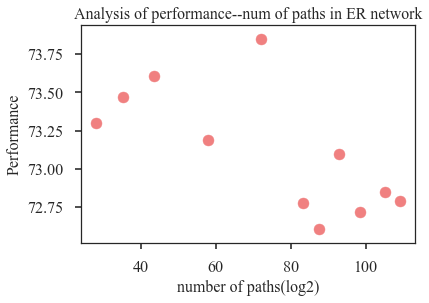

In [22]:
plt.scatter(er,er_r, c="lightcoral",marker='o',s=120,label="ER")
plt.title("Analysis of performance--num of paths in ER network",fontsize=16)
plt.xlabel("number of paths(log2)",fontsize=16)
plt.ylabel("Performance",fontsize=16)
#plt.legend(bbox_to_anchor=(1.02, 0),loc=3, borderaxespad=0)
plt.show()

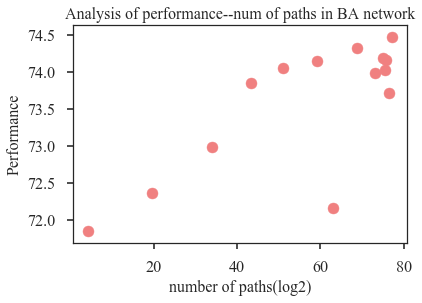

In [27]:
plt.scatter(ba,ba_r, c="lightcoral",marker='o',s=120)
plt.title("Analysis of performance--num of paths in BA network",fontsize=16)
plt.xlabel("number of paths(log2)",fontsize=16)
plt.ylabel("Performance",fontsize=16)
#plt.legend(bbox_to_anchor=(1.02, 0),loc=3, borderaxespad=0)
plt.show()

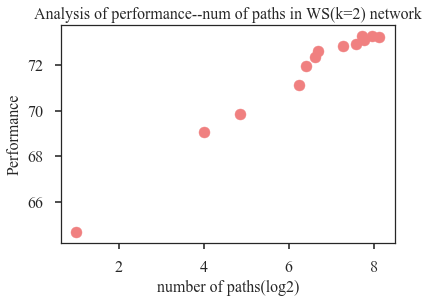

In [28]:
plt.scatter(ws2,ws_2r, c="lightcoral",marker='o',s=120)
plt.title("Analysis of performance--num of paths in WS(k=2) network",fontsize=16)
plt.xlabel("number of paths(log2)",fontsize=16)
plt.ylabel("Performance",fontsize=16)
#plt.legend(bbox_to_anchor=(1.02, 0),loc=3, borderaxespad=0)
plt.show()

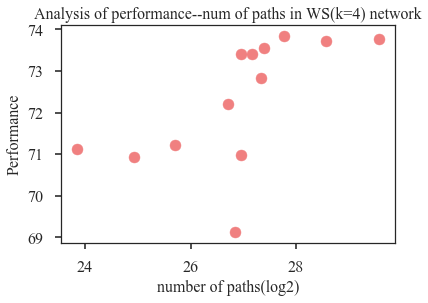

In [29]:
plt.scatter(ws4,ws_4r, c="lightcoral",marker='o',s=120)
plt.title("Analysis of performance--num of paths in WS(k=4) network",fontsize=16)
plt.xlabel("number of paths(log2)",fontsize=16)
plt.ylabel("Performance",fontsize=16)
#plt.legend(bbox_to_anchor=(1.02, 0),loc=3, borderaxespad=0)
plt.show()

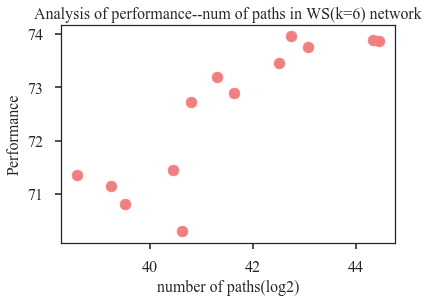

In [30]:
plt.scatter(ws6,ws_6r, c="lightcoral",marker='o',s=120)
plt.title("Analysis of performance--num of paths in WS(k=6) network",fontsize=16)
plt.xlabel("number of paths(log2)",fontsize=16)
plt.ylabel("Performance",fontsize=16)
#plt.legend(bbox_to_anchor=(1.02, 0),loc=3, borderaxespad=0)
plt.show()

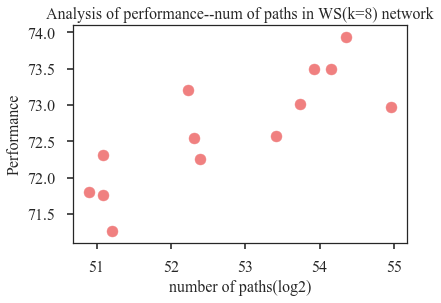

In [32]:
plt.scatter(ws8,ws_8r, c="lightcoral",marker='o',s=120)
plt.title("Analysis of performance--num of paths in WS(k=8) network",fontsize=16)
plt.xlabel("number of paths(log2)",fontsize=16)
plt.ylabel("Performance",fontsize=16)
#plt.legend(bbox_to_anchor=(1.02, 0),loc=3, borderaxespad=0)
plt.show()

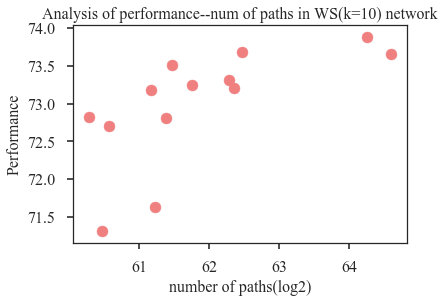

In [33]:
plt.scatter(ws10,ws_10r, c="lightcoral",marker='o',s=120)
plt.title("Analysis of performance--num of paths in WS(k=10) network",fontsize=16)
plt.xlabel("number of paths(log2)",fontsize=16)
plt.ylabel("Performance",fontsize=16)
#plt.legend(bbox_to_anchor=(1.02, 0),loc=3, borderaxespad=0)
plt.show()

### regression analysis---Resnet

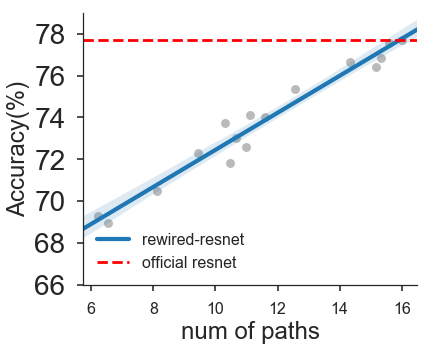

In [39]:
x = [65536,49512,36864,20480,40960,6027,3073,2226,1604,2026,1272,1404,701,278,93,75]  #num of paths
acc = [77.68,77.54,76.43,76.63,76.83,75.35,74.04,74.11,73.01,72.56,73.72,71.82,72.30,70.49,68.95,69.28]

sns.set_context("poster")
sns.set_style("ticks")

current_palette = sns.color_palette('muted',n_colors=5)

point_color = '#a9a9a9'
line_color = current_palette[0]
line_width = 4
point_size = 80

fig = plt.figure(figsize=(6,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.regplot(np.array(np.log2(x)),np.array(acc),order=1,scatter_kws={'s':point_size, 'color':point_color})
plt.xlabel('num of paths', fontsize=24)
plt.ylabel('Accuracy(%)', fontsize=24)
plt.yticks(fontsize=28)
plt.ylim(66, 79)
plt.axhline(y=77.68, color='r', linestyle='--')
plt.legend(['rewired-resnet',"official resnet"],loc='best',ncol=1)
plt.show()